Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from metrics_module import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from dataloader_module import load_data, extreure_columnes
import numpy as np
from graphs_module import plot_roc_auc

D:\.anaconda\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\.anaconda\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Càrrega i pre-processament de les dades

In [3]:
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creació i test de l'arbre de decissió

Accuracy: 0.9165
Precision: 0.0857
Recall: 0.0566
F1 Score: 0.0682


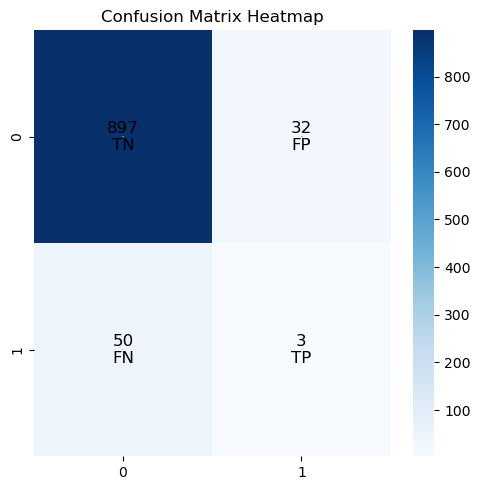

In [4]:
clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

np.save('predictions/predictions_tree.npy', y_pred)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## Visualització de l'arbre de decisió

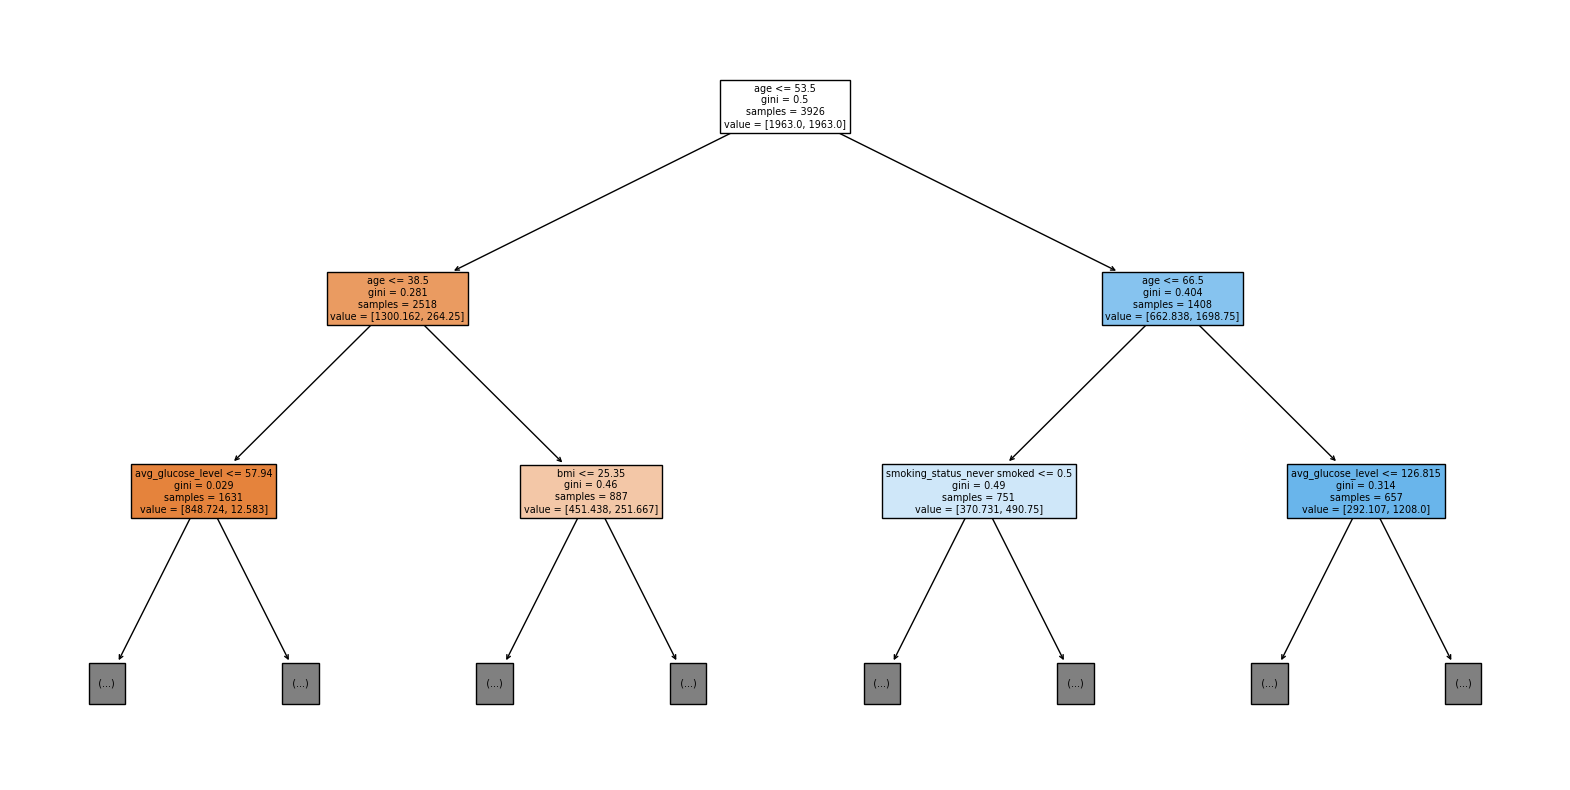

In [5]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

## Visualització dels factors més importants pel model

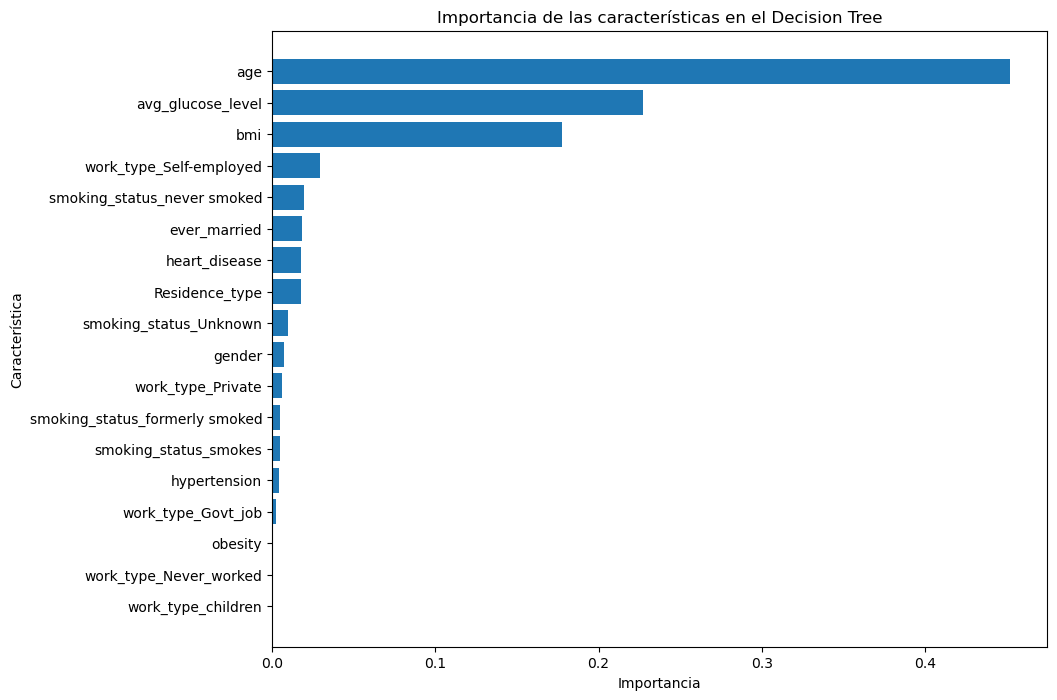

In [6]:
feature_importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()

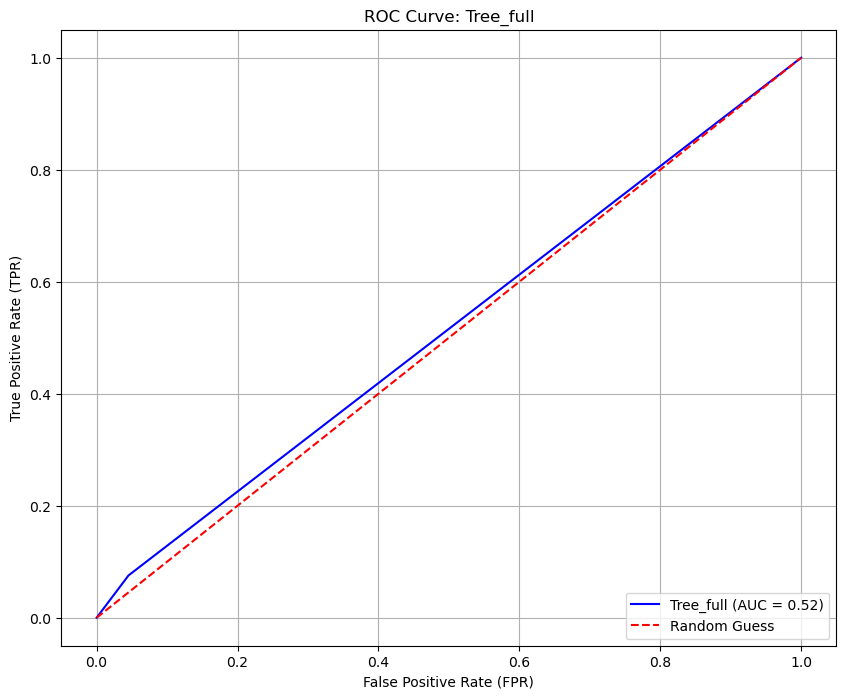

Tree_full AUC Score: 0.52


In [7]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Tree_full")

## Li treiem les tres característiques més importants segons el gràfic generat

Accuracy: 0.7342
Precision: 0.0772
Recall: 0.3585
F1 Score: 0.1271


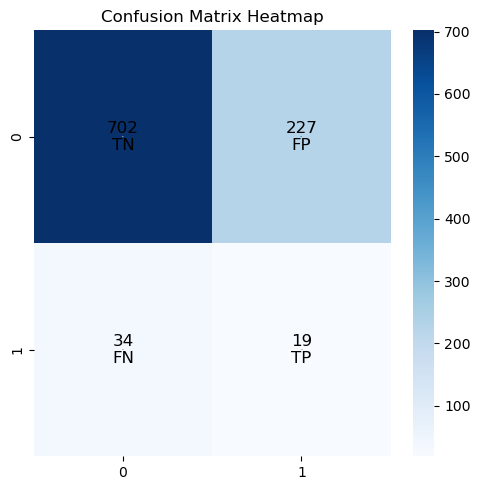

In [8]:
X,Y = load_data(datafile)
X,y = extreure_columnes(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

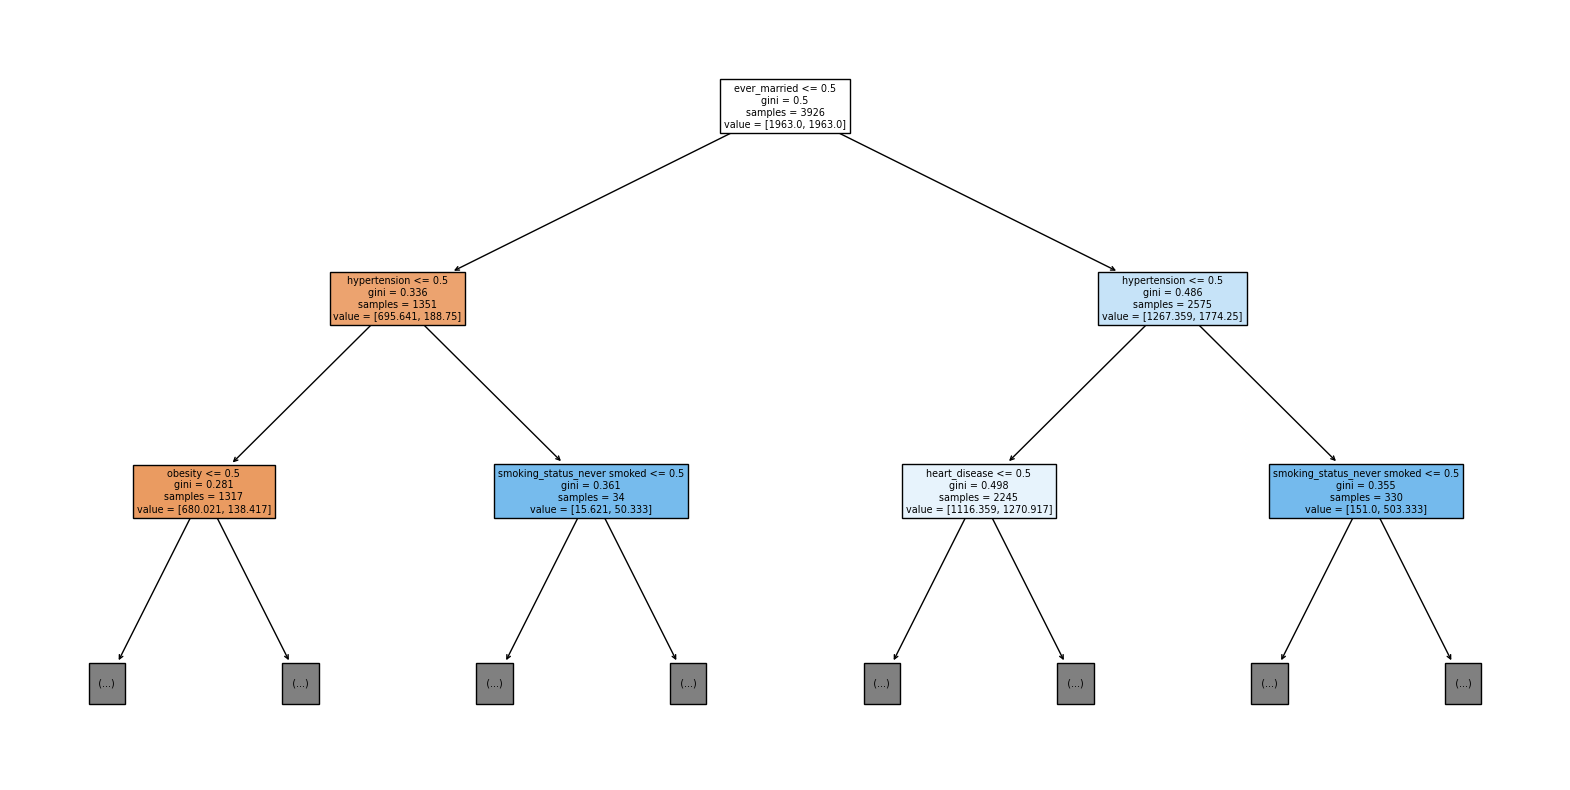

In [9]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

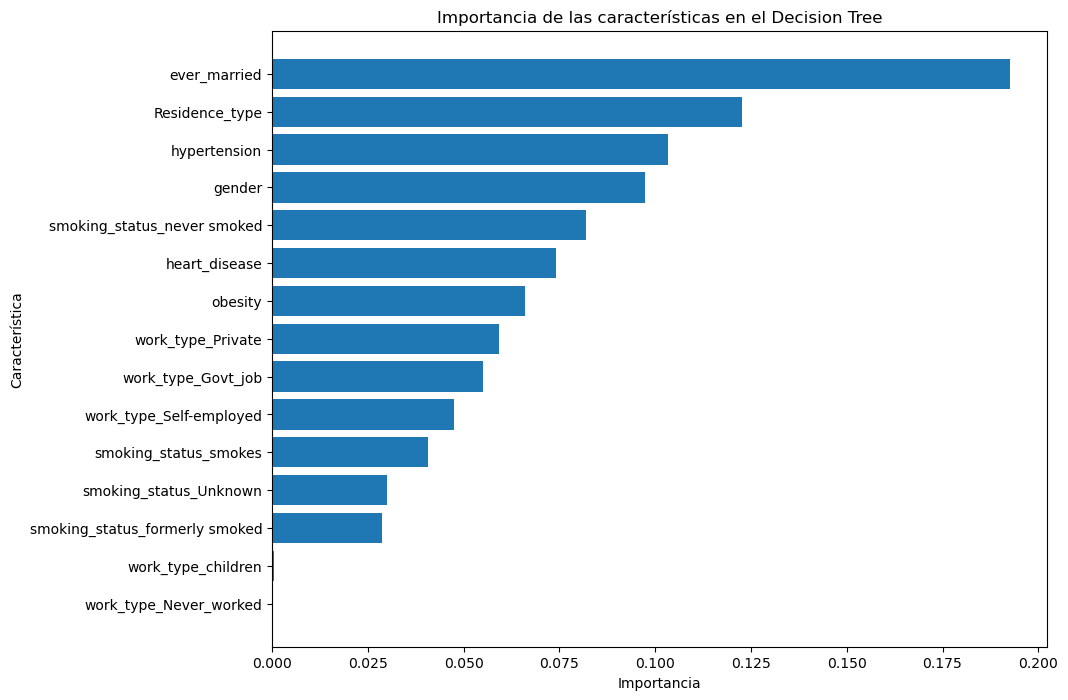

In [10]:
feature_importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()

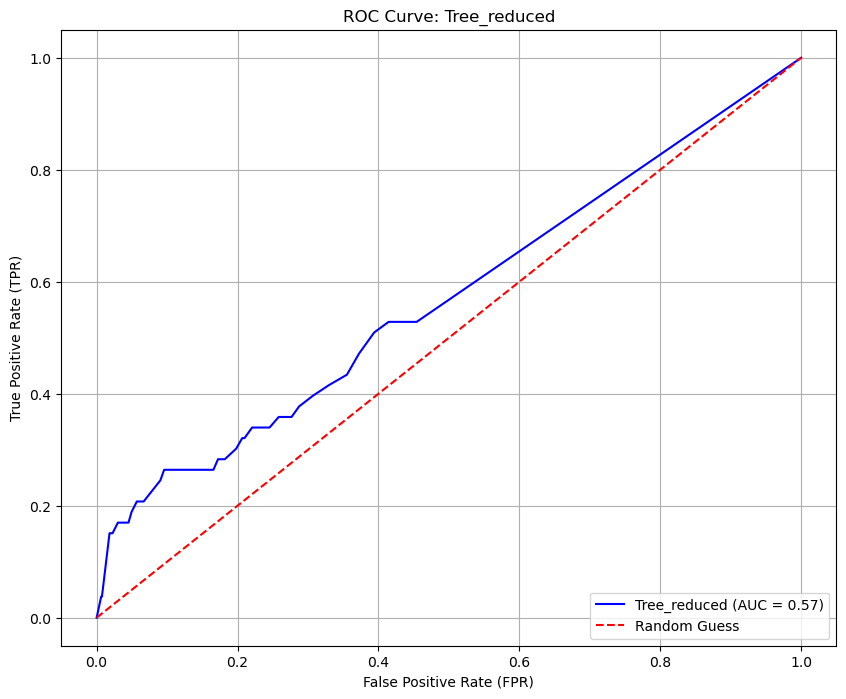

Tree_reduced AUC Score: 0.57


In [11]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Tree_reduced")